In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from statsmodels.formula.api import ols, glm

In [31]:
happy_life = pd.read_excel('data4/삶의만족도.xlsx')
happy_life

,No,시도,구군,삶의 만족도
0,1,서울특별시,종로구,0.4437
1,2,서울특별시,중구,0.4976
2,3,서울특별시,용산구,0.6161
3,4,서울특별시,성동구,0.4729
4,5,서울특별시,광진구,0.4041
...,...,...,...,...
224,225,경상남도,함양군,0.9565
225,226,경상남도,거창군,0.6163
226,227,경상남도,합천군,0.8057
227,228,제주특별자치도,제주시,0.7113


In [32]:
happy_health = pd.read_excel('data4/건강.xlsx')
happy_health

,No,시도,구군,평균,주관적 건강수준 인지율,인구 십만명당 정신건강증진기관 수,인구 천명당 의료기관 종사 의사수,건강생활실천율,인구 천명당 의료기관병상수
0,1,서울특별시,종로구,0.9220,0.8424,0.6914,1.0000,0.9697,0.7616
1,2,서울특별시,중구,0.6742,0.5772,0.4106,0.9995,0.9669,0.4043
2,3,서울특별시,용산구,0.5898,0.9819,0.3353,0.6046,0.9844,0.1433
3,4,서울특별시,성동구,0.4794,0.5465,0.3321,0.5783,0.9776,0.2111
4,5,서울특별시,광진구,0.6373,0.8534,0.7393,0.6352,0.8022,0.1936
...,...,...,...,...,...,...,...,...,...
224,225,경상남도,함양군,0.2036,0.0413,0.9857,0.3253,0.1775,0.1068
225,226,경상남도,거창군,0.2150,0.4107,0.4134,0.3705,0.0730,0.4106
226,227,경상남도,합천군,0.2128,0.0360,0.5756,0.3834,0.0320,0.6432
227,228,제주특별자치도,제주시,0.2537,0.4969,0.3854,0.4609,0.2527,0.2240


In [33]:
happy_safe = pd.read_excel('data4/안전.xlsx')
happy_environ = pd.read_excel('data4/환경.xlsx')
happy_econo = pd.read_excel('data4/경제.xlsx')
happy_edu = pd.read_excel('data4/교육.xlsx')
happy_relation = pd.read_excel('data4/관계 및 사회참여.xlsx')
happy_leisure = pd.read_excel('data4/여가.xlsx')

In [34]:
happy_df = happy_life
happy_df['건강'] = happy_health['평균']
happy_df['안전'] = happy_safe['평균']
happy_df['환경'] = happy_environ['평균']
happy_df['경제'] = happy_econo['평균']
happy_df['교육'] = happy_edu['평균']
happy_df['관계 및 사회참여'] = happy_relation['평균']
happy_df['여가'] = happy_leisure['평균']

happy_df.columns = happy_df.columns.str.replace(' ', '_')

happy_df

,No,시도,구군,삶의_만족도,건강,안전,환경,경제,교육,관계_및_사회참여,여가
0,1,서울특별시,종로구,0.4437,0.9220,0.7470,0.4637,1.0000,0.6839,0.7425,0.6331
1,2,서울특별시,중구,0.4976,0.6742,0.9320,0.2865,0.9806,0.5013,0.4608,0.6691
2,3,서울특별시,용산구,0.6161,0.5898,0.5537,0.5030,0.6915,0.2679,0.4317,0.2817
3,4,서울특별시,성동구,0.4729,0.4794,0.5347,0.4196,0.6533,0.2464,0.4182,0.3257
4,5,서울특별시,광진구,0.4041,0.6373,0.6072,0.4992,0.4445,0.4879,0.3519,0.3313
...,...,...,...,...,...,...,...,...,...,...,...
224,225,경상남도,함양군,0.9565,0.2036,0.7012,0.7717,0.1401,0.5064,0.2192,0.6758
225,226,경상남도,거창군,0.6163,0.2150,0.4392,0.7998,0.1799,0.8178,0.5717,0.4838
226,227,경상남도,합천군,0.8057,0.2128,0.4268,0.9117,0.0373,0.1640,0.0510,0.7900
227,228,제주특별자치도,제주시,0.7113,0.2537,0.4461,0.6842,0.4250,0.6468,0.6107,0.6948


In [35]:
happy_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 229 entries, 0 to 228
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   No         229 non-null    int64  
 1   시도         229 non-null    object 
 2   구군         229 non-null    object 
 3   삶의_만족도     228 non-null    float64
 4   건강         228 non-null    float64
 5   안전         228 non-null    float64
 6   환경         228 non-null    float64
 7   경제         228 non-null    float64
 8   교육         228 non-null    float64
 9   관계_및_사회참여  228 non-null    float64
 10  여가         228 non-null    float64
dtypes: float64(8), int64(1), object(2)
memory usage: 19.8+ KB


In [36]:
happy_df.to_csv('data4/happy_df.csv', index=False)

In [37]:
happy_df.isnull().sum()

No           0
시도           0
구군           0
삶의_만족도       1
건강           1
안전           1
환경           1
경제           1
교육           1
관계_및_사회참여    1
여가           1
dtype: int64

In [38]:
happy_df1 = happy_df
happy_df1['삶의_만족도'] = happy_df['삶의_만족도'].fillna(happy_df['삶의_만족도'].median())
happy_df.isnull().sum()

No           0
시도           0
구군           0
삶의_만족도       0
건강           1
안전           1
환경           1
경제           1
교육           1
관계_및_사회참여    1
여가           1
dtype: int64

In [39]:
happy_df1 = happy_df.dropna()
happy_df1.isnull().sum()

No           0
시도           0
구군           0
삶의_만족도       0
건강           0
안전           0
환경           0
경제           0
교육           0
관계_및_사회참여    0
여가           0
dtype: int64

In [40]:
happy_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 229 entries, 0 to 228
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   No         229 non-null    int64  
 1   시도         229 non-null    object 
 2   구군         229 non-null    object 
 3   삶의_만족도     229 non-null    float64
 4   건강         228 non-null    float64
 5   안전         228 non-null    float64
 6   환경         228 non-null    float64
 7   경제         228 non-null    float64
 8   교육         228 non-null    float64
 9   관계_및_사회참여  228 non-null    float64
 10  여가         228 non-null    float64
dtypes: float64(8), int64(1), object(2)
memory usage: 19.8+ KB


In [41]:
happy_df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 223 entries, 0 to 228
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   No         223 non-null    int64  
 1   시도         223 non-null    object 
 2   구군         223 non-null    object 
 3   삶의_만족도     223 non-null    float64
 4   건강         223 non-null    float64
 5   안전         223 non-null    float64
 6   환경         223 non-null    float64
 7   경제         223 non-null    float64
 8   교육         223 non-null    float64
 9   관계_및_사회참여  223 non-null    float64
 10  여가         223 non-null    float64
dtypes: float64(8), int64(1), object(2)
memory usage: 20.9+ KB


In [42]:
happy_df1.describe()

,No,삶의_만족도,건강,안전,환경,경제,교육,관계_및_사회참여,여가
count,223.000000,223.000000,223.000000,223.000000,223.000000,223.000000,223.000000,223.000000,223.000000
mean,114.950673,0.495171,0.405873,0.455517,0.577374,0.392500,0.542274,0.470994,0.463204
std,65.925239,0.267122,0.181590,0.190406,0.181753,0.211245,0.235800,0.199592,0.229254
min,1.000000,0.005200,0.005500,0.031100,0.073300,0.008600,0.013900,0.009400,0.023800
25%,59.500000,0.292850,0.268300,0.313850,0.455200,0.230850,0.370550,0.339250,0.278200
50%,115.000000,0.483900,0.389700,0.446100,0.598700,0.378800,0.563200,0.473200,0.447800
75%,170.500000,0.699550,0.525100,0.602500,0.701300,0.513150,0.730250,0.617850,0.647400
max,229.000000,0.999000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [43]:
happy_df1.시도.value_counts()

시도
경기도        31
서울특별시      25
전라남도       21
경상북도       21
강원도        18
경상남도       18
부산광역시      15
충청남도       15
전라북도       14
충청북도       11
인천광역시      10
대구광역시       6
광주광역시       5
대전광역시       5
울산광역시       5
제주특별자치도     2
세종특별자치시     1
Name: count, dtype: int64

In [44]:
happy_df1.groupby('시도')['삶의_만족도'].mean()

시도
강원도        0.619506
경기도        0.426023
경상남도       0.530794
경상북도       0.477367
광주광역시      0.484480
대구광역시      0.432833
대전광역시      0.407580
부산광역시      0.365787
서울특별시      0.490972
세종특별자치시    0.907700
울산광역시      0.471980
인천광역시      0.411480
전라남도       0.549557
전라북도       0.608193
제주특별자치도    0.711300
충청남도       0.553100
충청북도       0.410100
Name: 삶의_만족도, dtype: float64

In [45]:
happy_df1.groupby('시도').agg({'삶의_만족도':['mean', 'sum'], '건강':['mean', 'sum']})

삶의_만족도                 건강         
             mean      sum      mean      sum
시도                                           
강원도      0.619506  11.1511  0.329506   5.9311
경기도      0.426023  13.2067  0.353952  10.9725
경상남도     0.530794   9.5543  0.312722   5.6290
경상북도     0.477367  10.0247  0.271990   5.7118
광주광역시    0.484480   2.4224  0.632300   3.1615
대구광역시    0.432833   2.5970  0.538483   3.2309
대전광역시    0.407580   2.0379  0.663580   3.3179
부산광역시    0.365787   5.4868  0.517073   7.7561
서울특별시    0.490972  12.2743  0.569532  14.2383
세종특별자치시  0.907700   0.9077  0.232000   0.2320
울산광역시    0.471980   2.3599  0.420040   2.1002
인천광역시    0.411480   4.1148  0.339620   3.3962
전라남도     0.549557  11.5407  0.419205   8.8033
전라북도     0.608193   8.5147  0.421300   5.8982
제주특별자치도  0.711300   1.4226  0.253700   0.5074
충청남도     0.553100   8.2965  0.347433   5.2115
충청북도     0.410100   4.5111  0.401064   4.4117

In [46]:
happy_df1.groupby('시도').agg({'삶의_만족도':'mean', '건강':'sum'})

,삶의_만족도,건강
시도,,
강원도,0.619506,5.9311
경기도,0.426023,10.9725
경상남도,0.530794,5.6290
경상북도,0.477367,5.7118
광주광역시,0.484480,3.1615
대구광역시,0.432833,3.2309
대전광역시,0.407580,3.3179
부산광역시,0.365787,7.7561
서울특별시,0.490972,14.2383


In [47]:
happy_df1.groupby('시도').agg({'삶의_만족도':['mean','median'], '건강':['sum', 'std']})

삶의_만족도                건강          
             mean   median      sum       std
시도                                           
강원도      0.619506  0.71235   5.9311  0.096995
경기도      0.426023  0.35290  10.9725  0.143195
경상남도     0.530794  0.46840   5.6290  0.132623
경상북도     0.477367  0.48390   5.7118  0.143078
광주광역시    0.484480  0.47560   3.1615  0.166054
대구광역시    0.432833  0.41385   3.2309  0.303610
대전광역시    0.407580  0.29350   3.3179  0.133533
부산광역시    0.365787  0.42390   7.7561  0.206349
서울특별시    0.490972  0.49760  14.2383  0.147599
세종특별자치시  0.907700  0.90770   0.2320       NaN
울산광역시    0.471980  0.47640   2.1002  0.143179
인천광역시    0.411480  0.34060   3.3962  0.116198
전라남도     0.549557  0.56790   8.8033  0.171739
전라북도     0.608193  0.60020   5.8982  0.094197
제주특별자치도  0.711300  0.71130   0.5074  0.000000
충청남도     0.553100  0.49720   5.2115  0.196300
충청북도     0.410100  0.29270   4.4117  0.133059

In [48]:
data = happy_df1.loc[:,'삶의_만족도' : '여가']
data

,삶의_만족도,건강,안전,환경,경제,교육,관계_및_사회참여,여가
0,0.4437,0.9220,0.7470,0.4637,1.0000,0.6839,0.7425,0.6331
1,0.4976,0.6742,0.9320,0.2865,0.9806,0.5013,0.4608,0.6691
2,0.6161,0.5898,0.5537,0.5030,0.6915,0.2679,0.4317,0.2817
3,0.4729,0.4794,0.5347,0.4196,0.6533,0.2464,0.4182,0.3257
4,0.4041,0.6373,0.6072,0.4992,0.4445,0.4879,0.3519,0.3313
...,...,...,...,...,...,...,...,...
224,0.9565,0.2036,0.7012,0.7717,0.1401,0.5064,0.2192,0.6758
225,0.6163,0.2150,0.4392,0.7998,0.1799,0.8178,0.5717,0.4838
226,0.8057,0.2128,0.4268,0.9117,0.0373,0.1640,0.0510,0.7900
227,0.7113,0.2537,0.4461,0.6842,0.4250,0.6468,0.6107,0.6948


In [49]:
data = happy_df1.rename(columns={'삶의_만족도':'만족도'})
data

,No,시도,구군,만족도,건강,안전,환경,경제,교육,관계_및_사회참여,여가
0,1,서울특별시,종로구,0.4437,0.9220,0.7470,0.4637,1.0000,0.6839,0.7425,0.6331
1,2,서울특별시,중구,0.4976,0.6742,0.9320,0.2865,0.9806,0.5013,0.4608,0.6691
2,3,서울특별시,용산구,0.6161,0.5898,0.5537,0.5030,0.6915,0.2679,0.4317,0.2817
3,4,서울특별시,성동구,0.4729,0.4794,0.5347,0.4196,0.6533,0.2464,0.4182,0.3257
4,5,서울특별시,광진구,0.4041,0.6373,0.6072,0.4992,0.4445,0.4879,0.3519,0.3313
...,...,...,...,...,...,...,...,...,...,...,...
224,225,경상남도,함양군,0.9565,0.2036,0.7012,0.7717,0.1401,0.5064,0.2192,0.6758
225,226,경상남도,거창군,0.6163,0.2150,0.4392,0.7998,0.1799,0.8178,0.5717,0.4838
226,227,경상남도,합천군,0.8057,0.2128,0.4268,0.9117,0.0373,0.1640,0.0510,0.7900
227,228,제주특별자치도,제주시,0.7113,0.2537,0.4461,0.6842,0.4250,0.6468,0.6107,0.6948


In [50]:
Rformula = '만족도~건강+안전+환경+경제+교육+관계_및_사회참여+여가'
regression_result = ols(Rformula, data=data).fit()
regression_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    만족도   R-squared:                       0.184
Model:                            OLS   Adj. R-squared:                  0.158
Method:                 Least Squares   F-statistic:                     6.943
Date:                Fri, 23 May 2025   Prob (F-statistic):           1.86e-07
Time:                        16:40:54   Log-Likelihood:                 1.1708
No. Observations:                 223   AIC:                             13.66
Df Residuals:                     215   BIC:                             40.92
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0412      0.118     -0.348      0.728      -0.275       0.192
건강             0.1390      0.095      1.469      0.143      -0.047       0.326
안전             0.0562      0.104      0.539      0.590      -0.149       0.262
환경             0.4750      0.126      3.778      0.000       0.227       0.723
경제             0.0791      0.106      0.749      0.454      -0.129       0.287
교육            -0.0432      0.082     -0.527      0.599      -0.205       0.118
관계_및_사회참여      0.1961      0.090      2.178      0.030       0.019       0.374
여가             0.1730      0.086      2.011      0.046       0.003       0.343
==============================================================================
Omnibus:                        5.524   Durbin-Watson:                   2.204
Prob(Omnibus):                  0.063   Jarque-Bera (JB):                3.982
Skew:                          -0.192   Prob(JB):                        0.137
Kurtosis:                       2.469   Cond. No.                         17.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [51]:
import statsmodels.api as sm
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

In [ ]:
others = list(set(data.columns).difference(set(['만족도', '건강'])))
others

['No', '경제', '관계_및_사회참여', '교육', '구군', '시도', '안전', '여가', '환경']

(<Figure size 640x480 with 1 Axes>,
 (array([-7.66053887e-15, -2.36865728e-02, -1.22124533e-15,  7.54396545e-14,
         -2.28705943e-14,  2.90878432e-14,  6.83897383e-14,  4.94049246e-15,
          1.84463556e-13,  6.20059559e-14, -1.43385304e-13, -1.82576176e-13,
          6.82787160e-14, -3.33066907e-16, -2.94209102e-14,  2.36865728e-02,
          1.43218770e-14,  8.49320614e-15,  2.20934382e-14, -8.27116153e-15,
         -7.99360578e-15,  1.52100554e-14,  2.50910404e-14,  5.10702591e-15,
         -6.99440506e-15, -5.48395800e-02,  6.38242438e-02, -5.17722793e-02,
         -1.05471187e-14, -2.17603713e-14, -2.05391260e-14,  6.64741883e-02,
         -2.83106871e-14, -6.10622664e-14, -4.14113188e-14, -2.36865728e-02,
          1.94289029e-15, -4.56301663e-14, -2.65343303e-14, -4.29101199e-14,
          5.15798446e-02, -4.16871779e-02, -9.89266671e-03, -4.72399897e-14,
         -1.04916076e-14, -8.88178420e-15,  4.96774907e-02,  8.44597093e-03,
         -3.32511796e-14, -1.98174810e-1

<Figure size 800x1300 with 0 Axes>

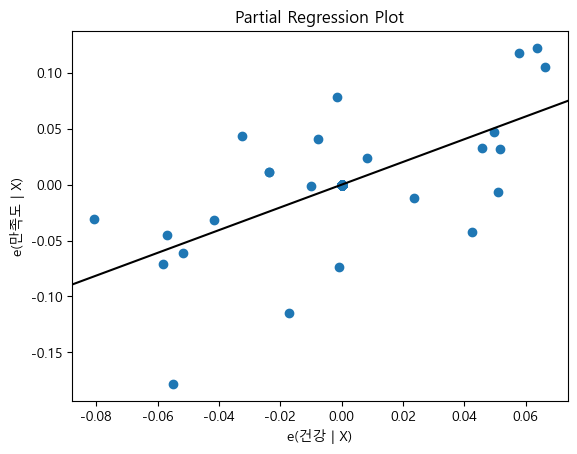

In [53]:
fig = plt.figure(figsize=(8,13))
sm.graphics.plot_partregress('만족도', '건강', others, data=data, ret_coords=True, obs_labels=False)

In [54]:
sm.graphics.plot_partregress_grid(regression_result, fig=fig)
plt.show()

<Axes: >

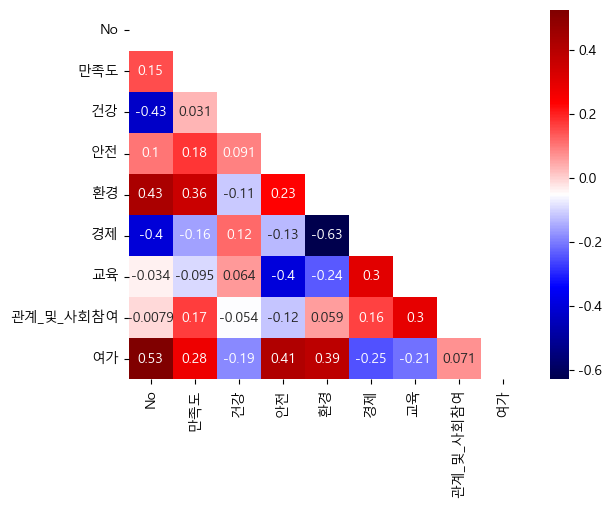

In [55]:
corr= data.corr(numeric_only=True)
mask= np.triu(corr)
sns.heatmap(corr, mask=mask, annot=True, cmap='seismic')